In [1]:
from MNNparcellation import CSParcellation as CSP  # dMRIParcellation package
from MNNparcellation import util
import numpy as np
import seaborn as sns

%matplotlib inline
axisfsize = 10
fsize = 10
rc={'axes.labelsize': axisfsize, 'font.size': axisfsize, 'legend.fontsize': axisfsize, 'axes.titlesize': axisfsize, 'xtick.labelsize' : axisfsize,
    'ytick.labelsize' : axisfsize, 'axes.labelweight': 'bold', "lines.linewidth": 1.0}
sns.set(rc=rc)

def label_display(label, n_particle):
    n_s = len(label)
    image = np.zeros((n_s, n_particle))
    for i in range(n_s):
        image[i, :] = label[i]*np.ones((1, n_particle))
    return image

In [2]:
# Generate random data
nbr_seeds = 100
n_reg = 10
seed_reg = nbr_seeds/n_reg
Label = np.zeros(nbr_seeds, dtype=int)
Connectivity = np.array(np.eye(nbr_seeds))
coordinate = np.array(np.zeros((nbr_seeds,3)))
nbr_partical = 1000
tracto = []
for i in range(n_reg):
    Label[i * seed_reg:(i + 1)*seed_reg] = i
    Connectivity[i * seed_reg:(i + 1)*seed_reg,i * seed_reg:(i + 1) * seed_reg] = 1
    for j in range(seed_reg):
        tracto.append((i+1)*np.ones(nbr_partical)) # load tractograms
finger_print = np.reshape(tracto, (nbr_seeds, nbr_partical))

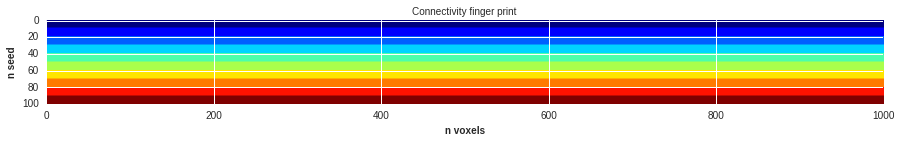

In [3]:
sns.plt.figure(figsize=(15,6))
sns.plt.imshow(finger_print, cmap='jet');
sns.plt.xlabel('n voxels');
sns.plt.ylabel('n seed');
sns.plt.title('Connectivity finger print');

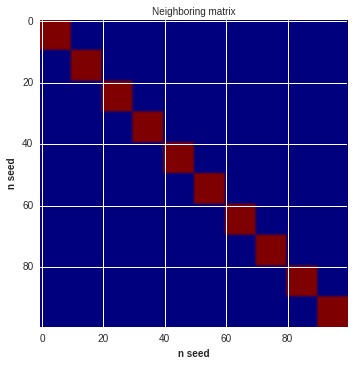

In [4]:
sns.plt.imshow(Connectivity, cmap='jet');
sns.plt.xlabel('n seed');
sns.plt.ylabel('n seed');
sns.plt.title('Neighboring matrix');

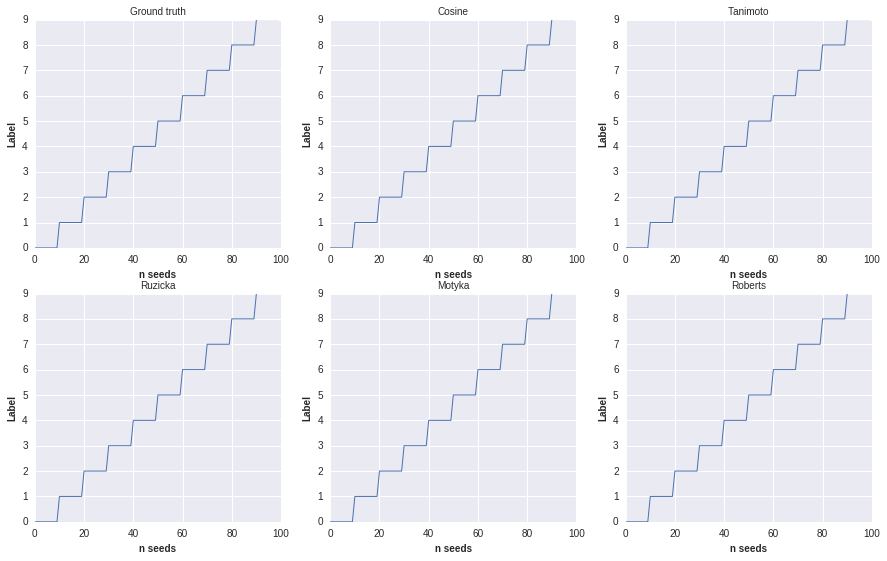

In [5]:
sim = CSP.Parcellation("","","","", write_data=False) # initialize the package
sim.save_path = './data/'
Excluded_seeds = []
sim.PrepareData(coordinate, Connectivity, Excluded_seeds)
sim.Parc.tractograms = tracto
sim.Parc.nonzero_tracto = np.array(range(nbr_seeds))
sim.Parc.zero_tracto = []
sim.Parc.Similarity_Matrix = np.zeros(nbr_seeds*(nbr_seeds - 1)/2)
sim.nbr = nbr_seeds
sim.Connectivity_X = Connectivity
face = np.array(np.zeros((nbr_seeds, 3)))
normal = np.zeros(nbr_seeds)
sim.mesh.faces = face
sim.mesh.normal = normal
sim.mesh.vertices = coordinate
sim.mesh.connectivity = Connectivity
SM_method = ['Cosine', 'Tanimoto', 'Ruzicka', 'Motyka','Roberts']
GT = label_display(Label, nbr_partical)
sns.plt.figure(figsize=(15,9))
sns.plt.subplot(2, 3, 1)
sns.plt.plot(Label)
sns.plt.title('Ground truth')
sns.plt.xlabel('n seeds')
sns.plt.ylabel('Label')
for i in range(len(SM_method)):
    # run the parcellation
    sim.Parcellation_agg(coordinate, Connectivity, Excluded_seeds, [n_reg], [SM_method[i]], sim.mesh, np.inf) 
    sns.plt.subplot(2, 3, i+2)
    RE = label_display(sim.Labels, nbr_partical)
    sns.plt.plot(sim.Labels)
    sns.plt.title(SM_method[i])
    sns.plt.xlabel('n seeds')
    sns.plt.ylabel('Label')